In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df=pd.read_excel("D:\ExcelR Data Science\Assignments\Forecasting\Airlines+Data.xlsx",sheet_name='Sheet1')

In [3]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [11]:
# EDA 

df['Month']=pd.to_datetime(df['Month'], infer_datetime_format=True)
df=df.set_index(['Month'])

In [12]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


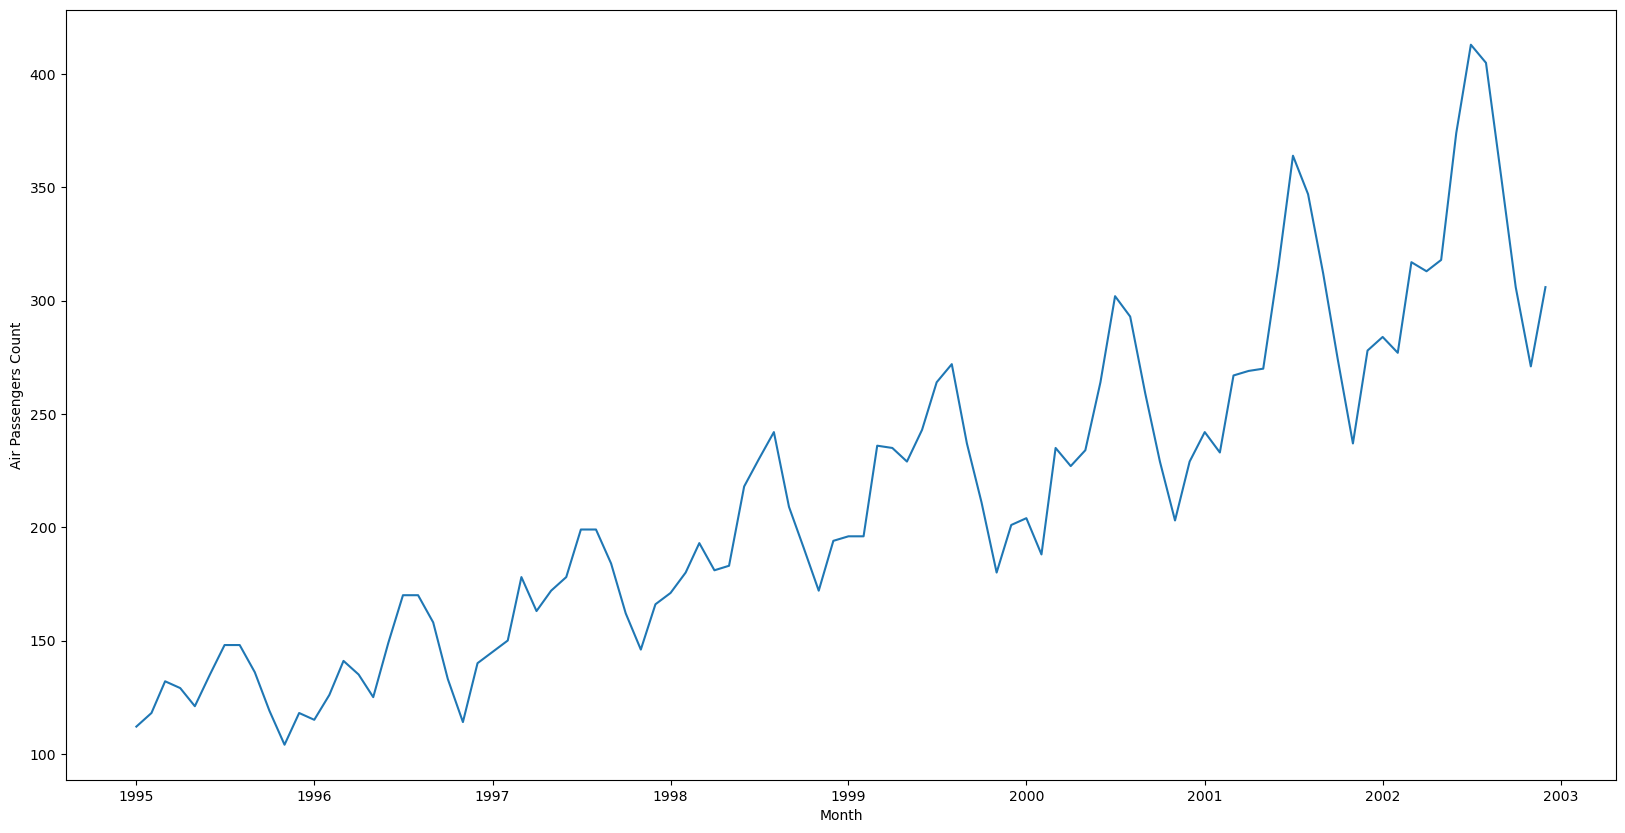

In [13]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Air Passengers Count")
plt.plot(df)

In [14]:
# calculating trend


trend=df['Passengers'].rolling(window=12).mean()

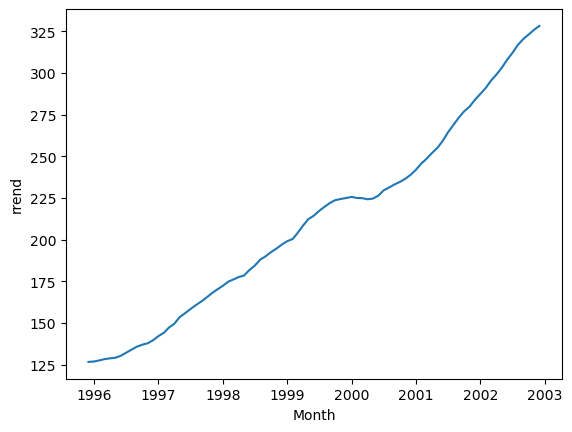

In [15]:
# Plot the trend
plt.plot(trend)
plt.xlabel('Month')
plt.ylabel('rrend')
plt.show()

In [16]:
#Calculating Seasonilty


seasonality = df['Passengers'] - trend

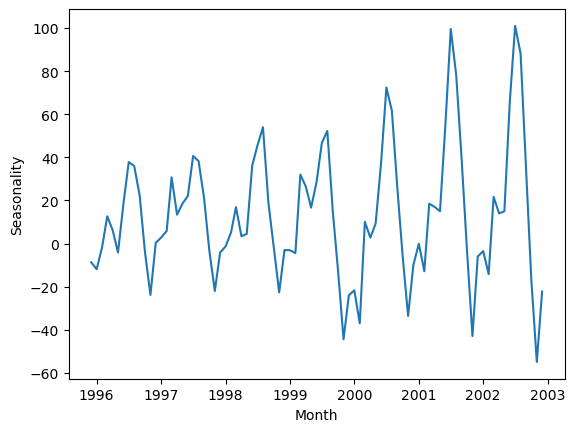

In [17]:
# Plot the seasonality
plt.plot(seasonality)
plt.xlabel('Month')
plt.ylabel('Seasonality')
plt.show()


In [18]:
# Determining rolling statistics
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()

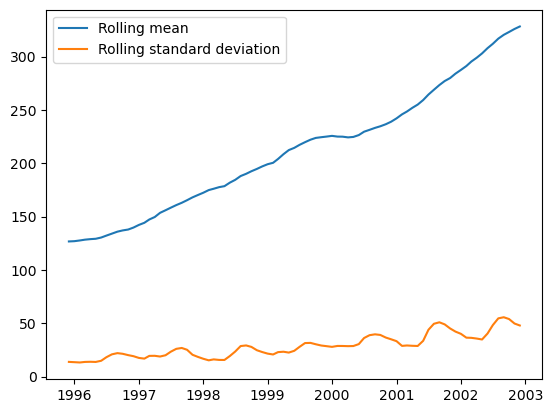

In [19]:
# Plot the rolling statistics
plt.plot(rolmean, label='Rolling mean')
plt.plot(rolstd, label='Rolling standard deviation')
plt.legend()
plt.show()

# Calculating ACF & PCF

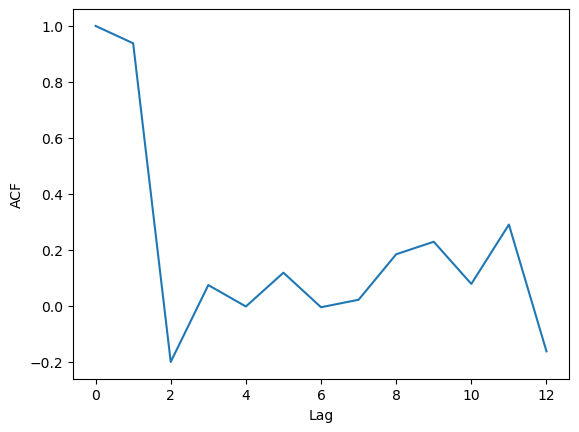

In [21]:
import statsmodels.tsa.stattools as stattools
# Calculate the ACF
acf = stattools.pacf(df['Passengers'], nlags=12)

# Plot the ACF
plt.plot(acf)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

D:\PythnCodes\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


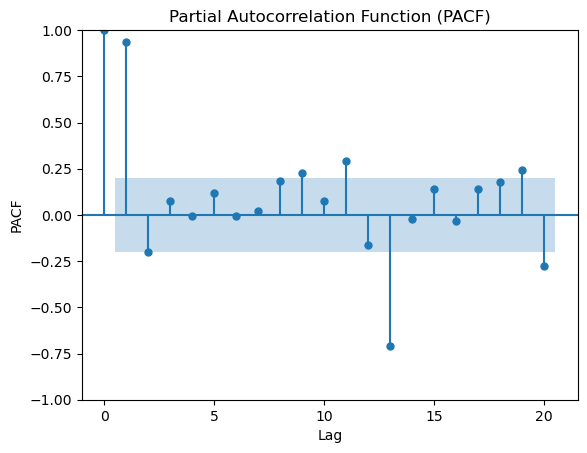

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf


# Calculate the PACF
plot_pacf(df['Passengers'])
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Time Series Forecasting



In [25]:
# Fit the model
model = ARIMA(df['Passengers'], order=(20, 2, 4))
model_fit = model.fit()

D:\PythnCodes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\PythnCodes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\PythnCodes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\PythnCodes\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\PythnCodes\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn

In [26]:
# Make predictions
start_date = df.index[-1] + pd.DateOffset(months=1)
end_date = df.index[-1] + pd.DateOffset(months=13)
predictions = model_fit.predict(start=start_date, end=end_date)

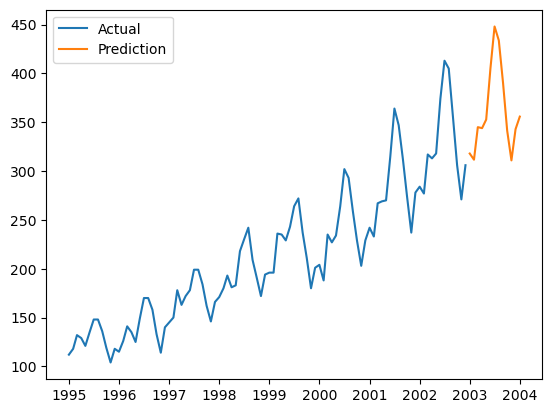

In [27]:
# Plot the predictions
plt.plot(df['Passengers'], label='Actual')
plt.plot(predictions, label='Prediction')
plt.legend()
plt.show()